In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')

In [3]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


<AxesSubplot:xlabel='price', ylabel='Count'>

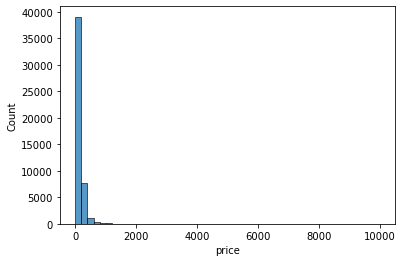

In [5]:
sns.histplot(df.price, bins=50)

In [6]:
df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

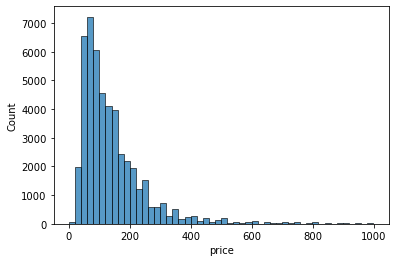

In [7]:
sns.histplot(df.price[df.price < 1000], bins=50)

In [8]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

id
[2539 2595 3647 3831 5022]
48895

name
['Clean & quiet apt home by the park' 'Skylit Midtown Castle'
 'THE VILLAGE OF HARLEM....NEW YORK !' 'Cozy Entire Floor of Brownstone'
 'Entire Apt: Spacious Studio/Loft by central park']
47905

host_id
[2787 2845 4632 4869 7192]
37457

host_name
['John' 'Jennifer' 'Elisabeth' 'LisaRoxanne' 'Laura']
11452

neighbourhood_group
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
5

neighbourhood
['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem']
221

latitude
[40.64749 40.75362 40.80902 40.68514 40.79851]
19048

longitude
[-73.97237 -73.98377 -73.9419  -73.95976 -73.94399]
14718

room_type
['Private room' 'Entire home/apt' 'Shared room']
3

price
[149 225 150  89  80]
674

minimum_nights
[ 1  3 10 45  2]
109

number_of_reviews
[  9  45   0 270  74]
394

last_review
['2018-10-19' '2019-05-21' nan '2019-07-05' '2018-11-19']
1764

reviews_per_month
[0.21 0.38  nan 4.64 0.1 ]
937

calculated_host_listings_count
[6 2 1 4 3]
47

avail

In [9]:
base = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews',
        'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [10]:
df_base =  df[base]
df_base

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,NaN,2,9
48891,40.70184,-73.93317,40,4,0,NaN,2,36
48892,40.81475,-73.94867,115,10,0,NaN,1,27
48893,40.75751,-73.99112,55,1,0,NaN,6,2


In [11]:
df_base.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [12]:
df_base.minimum_nights.describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [13]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [14]:
n_val, n_test, n_train

(9779, 9779, 29337)

In [15]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_train = df[base].iloc[idx[:n_train]]
df_val = df[base].iloc[idx[n_train:n_train+n_val]]
df_test = df[base].iloc[idx[n_train+n_val:]]

In [16]:
df_train.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,89,3,62,0.71,1,189
44383,40.70666,-73.90779,30,21,0,NaN,1,73
15394,40.76116,-73.99016,120,2,17,0.43,1,0
43230,40.70763,-74.01050,470,2,5,1.88,327,272
16332,40.79658,-73.93287,199,2,30,0.80,1,30


In [17]:
len(df_train), len(df_val), len(df_test)

(29337, 9779, 9779)

In [18]:
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)
y_train, y_val, y_test
len(y_train), len(y_val), len(y_test)

(29337, 9779, 9779)

In [19]:
del df_train['price']
del df_val['price']
del df_test['price']

In [20]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [21]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [22]:
base_no_price = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
        'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

In [23]:
def prepare_X(df_num, val):
    df_num = df_num.fillna(val)
    X = df_num.values
    return X

In [26]:
X_train = prepare_X(df_train, 0)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val, 0)
y_pred = w0 + X_val.dot(w)

<AxesSubplot:ylabel='Count'>

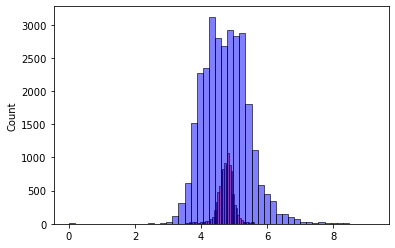

In [27]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [28]:
rmse(y_val, y_pred)

0.6430337788542608

In [29]:
df_train_orig = df.iloc[idx[:n_train]]

In [30]:
mean_price = df_train_orig['price'].mean()
mean_price

151.0864096533388

In [31]:
X_train = df_train[base_no_price].fillna(mean_price).values

In [32]:
w0, w = train_linear_regression(X_train, y_train)
X_val = df_val[base_no_price].fillna(mean_price).values

y_pred = w0 + X_val.dot(w)

<AxesSubplot:ylabel='Count'>

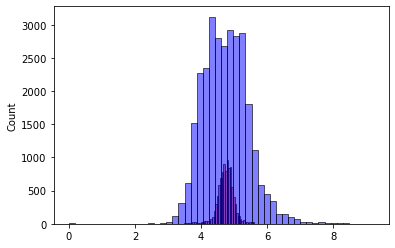

In [33]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [34]:
rmse(y_val, y_pred)

0.6416771654685713

In [35]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [36]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    

    print(r, "\t", w0, "\t", score)

0 	 -419.91265819954884 	 0.6430337788542608
1e-06 	 -419.86271536339126 	 0.6430341157373893
0.0001 	 -414.9764923406243 	 0.6430723153705951
0.001 	 -375.27365241689364 	 0.6437669735421272
0.01 	 -191.7838404905249 	 0.6557528427480581
0.1 	 -32.56256055529862 	 0.6773299642442646
1 	 -3.499216837343722 	 0.6823116950148167
5 	 -0.7033623181794142 	 0.6827915727850367
10 	 -0.35127675810385434 	 0.6828430212100086


In [37]:
scores = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    n = len(df)
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df[base].iloc[idx[:n_train]]
    df_val = df[base].iloc[idx[n_train:n_train+n_val]]
    df_test = df[base].iloc[idx[n_train+n_val:]]
    
    y_train = np.log1p(df_train.price.values)
    y_val = np.log1p(df_val.price.values)
    y_test = np.log1p(df_test.price.values)
    
    del df_train['price']
    del df_val['price']
    del df_test['price']
    
    X_train = prepare_X(df_train, 0)
    
    w0, w = train_linear_regression(X_train, y_train)
    
    X_val = prepare_X(df_val, 0)
    
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    scores.append(score)
    print(seed, "\t", w0, "\t", score)

print(scores)    

0 	 -427.62844710277386 	 0.6549779961001865
1 	 -414.7055496893249 	 0.6462523685644209
2 	 -423.2541339139965 	 0.6476558177277436
3 	 -421.89331599133743 	 0.6375145071082138
4 	 -422.06098999009396 	 0.6445809083811866
5 	 -429.1787524636481 	 0.6305809996954415
6 	 -427.4918961029367 	 0.6297851918579701
7 	 -428.1884696277277 	 0.6506184266652593
8 	 -427.6929104521171 	 0.648978035334034
9 	 -426.9826899475032 	 0.6437565168249776
[0.6549779961001865, 0.6462523685644209, 0.6476558177277436, 0.6375145071082138, 0.6445809083811866, 0.6305809996954415, 0.6297851918579701, 0.6506184266652593, 0.648978035334034, 0.6437565168249776]


In [38]:
std_scores = np.std(scores)

In [39]:
np.round(std_scores, 3)

0.008

In [41]:
    n = len(df)
    r = 0.001
    idx = np.arange(n)
    np.random.seed(9)
    np.random.shuffle(idx)

    df_train = df[base].iloc[idx[:n_train]]
    df_val = df[base].iloc[idx[n_train:n_train+n_val]]
    df_test = df[base].iloc[idx[n_train+n_val:]]
    
    y_train = np.log1p(df_train.price.values)
    y_val = np.log1p(df_val.price.values)
    y_test = np.log1p(df_test.price.values)
    
    del df_train['price']
    del df_val['price']
    del df_test['price']
    
    df_full_train = pd.concat([df_train, df_val])
    df_full_train = df_full_train.reset_index(drop=True)
    
    X_full_train = prepare_X(df_full_train, 0)
    y_full_train = np.concatenate([y_train, y_val])
    
    w0, w = train_linear_regression_reg(X_full_train, y_full_train, r)
    X_val = prepare_X(df_val, 0)
    
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    score


0.6438029052841159